# toy_atp

In [2]:
from __future__ import absolute_import, print_function, division
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cobra
import roadrunner

from IPython.display import display, HTML

import sbmlutils
from sbmlutils import dfba
from sbmlutils.dfba.simulator import simulate_dfba
from sbmlutils.dfba import utils

print('sbmlutils:', sbmlutils.__version__)
print('cobra:', cobra.__version__)
print('roadrunner:', roadrunner.__version__)

print(os.getcwd())

sbmlutils: 0.1.5a5
cobra: 0.6.1
roadrunner: 1.4.18; Compiler: gcc 4.8.2, C++ version: 199711; JIT Compiler: LLVM-3.3; Date: May 17 2017, 17:41:04; LibSBML Version: 5.14.0
/home/mkoenig/git/dfba/models/toy_atp


## Simulation settings

In [18]:
model_id = "toy_atp"
tend = 10.0
dt = 0.1

In [23]:
def plot_results(df, mid):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
    kwargs = {}
    for ax in (ax1, ax2):
        ax.plot(df.time, df['[ATP]'], color='darkred', label="[ATP]", **kwargs)
        ax.plot(df.time, df['[ADP]'], color='darkblue', label="[ADP]", **kwargs)
        ax.plot(df.time, df['[Glucose]'], color='darkgreen', label="[Glucose]", **kwargs)
        ax.plot(df.time, df['[Pyruvate]'], color='darkorange', label="[Pyruvate]", **kwargs)
        ax.plot(df.time, df['[ATP]']+df['[ADP]'], color='black', label="[ATP]+[ADP]", **kwargs)

    ax2.set_yscale('log')

    for ax in (ax1, ax2):
        ax.set_ylabel('Concentration [?]')

    for ax in (ax1, ax2):
        ax.set_title(mid)
        ax.set_xlabel('time [?]')
        ax.legend()

    plt.show()
    return fig 

## mk model

In [24]:
# model
sbml_mk = './mk/v1/toy_atp_top.xml'
print(sbml_mk)

# TODO: encode model
# run simulation 
# df_mk, dfba_model_mk, dfba_simulator_mk = simulate_dfba(sbml_mk, tend=tend, dt=dt)
# df_mk

./mk/v1/toy_atp_top.xml


## lw model
### Model issues
* arrays package (please remove if not needed, standard libsbml distributions do not contain arrays)
* the comp ids are wrong

In [25]:
# absolute path to latest top model (update with new version)
sbml_lw = './lw/v3/Top.xml'
print(sbml_lw)

from sbmlutils import validation
validation.check_sbml(sbml_lw)

./lw/v3/Top.xml
valid                    : <TRUE>
validation error(s)      : 0
validation warnings(s)   : 168
check time (ms)          : 0.22180800000000112
--------------------------------------------------------------------------------


./lw/v3/Top.xml
<SBMLDocument>
E0: SBML unit consistency (core, L8, code)  
------------------------------------------------------------
[Warning] Unable to verify consistency of units: the unit of time has not been declared
In situations where a mathematical expression refers to time, the units of time should be consistent with the global time units of the model. In models where the 'timeUnits' attribute has not been declared, libSBML does not yet have the functionality to verify accurately the consistency of the units in such expressions. 


E1: SBML unit consistency (core, L8, code)  
------------------------------------------------------------
[Warning] Unable to verify consistency of units: the units of reaction extent have not been declared
In situations where a mathematical expression refers to extent, the units of extent should be consistent with the global extent units of the model. In models where the 'extentUnits' attribute has not been declared, libSBML does not yet have th

(168, 0, 168)

./lw/v3/Top.xml
toy_atp_lw_v3-sbmlutils


cobra/io/sbml3.py:259 UserWarning: loading SBML model without fbc:strict="true"



Simulation time     : 0.299 [s]
Total time          : 0.348 [s]
Overhead time       : 0.049 [s] (14.1 %)



,time,[ADP],[ATP],[C1__ADP],[C1__ATP],[C1__Fructose],[C1__GADP],[C1__Glucose],[C1__Phosphoglycerate],[C1__Pyruvate],...,max_glucose,max_pyruvate,min_adp,min_atp,min_glucose,min_pyruvate,rateOfADP,rateOfATP,rateOfGlcxt,rateOfPy
0.0,0.0,1.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1000.0,0.0,-1000.0,0.0,0.0,2.000000,2.000000,1.000000,2.000000
0.1,0.1,0.819864,1.809983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.909488,1000.0,0.0,-1000.0,0.0,0.0,1.809983,1.809983,0.904992,1.809983
0.2,0.2,0.660487,1.638914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.828336,1000.0,0.0,-1000.0,0.0,0.0,1.638914,1.638914,0.819457,1.638914
0.3,0.3,0.520436,1.484893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.755584,1000.0,0.0,-1000.0,0.0,0.0,1.484893,1.484893,0.742447,1.484893
0.4,0.4,0.398622,1.346210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.690366,1000.0,0.0,-1000.0,0.0,0.0,1.346210,1.346210,0.673105,1.346210


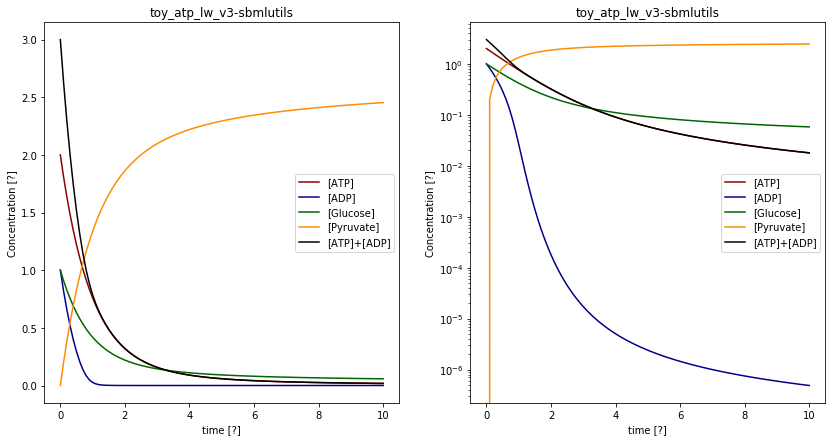

In [26]:
version_lw = 'v3'
sbml_lw = './lw/{}/Top.xml'.format(version_lw)
mid_lw = '{}_lw_{}-sbmlutils'.format(model_id, version_lw)
print(sbml_lw)
print(mid_lw)

# run simulation 
df_lw, dfba_model_lw, dfba_simulator_lw = simulate_dfba(sbml_lw, tend=tend, dt=dt)
df_lw

# results
display(df_lw.head())
df_lw.to_csv('./{}.csv'.format(mid_lw))

fig = plot_results(df_lw, mid_lw)
fig.savefig('./{}.png'.format(mid_lw), bbox_inches='tight')